In [ ]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns # untuk visualisasi data
import matplotlib.pyplot as plt # untuk visualisasi data
import missingno as msno # untuk visualisasi data

# untuk persiapan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
#Modelling
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
data=pd.read_excel('/content/2022.xlsx')

In [ ]:
np.random.seed(2022)

#Data Understanding

In [ ]:
data

,No.,Sector,Sub Sector Code,Sub Sector,Code,Stock Name,Sharia,"Market Cap., b.IDR","Regular Volume, th.shares","Regular Value, m.IDR","Regular Freq, x",Regular Days,"Total Volume, th.shares","Total Value, m.IDR","Total Freq, x",Total Days
0,1,Energy,A1,"Oil, Gas & Coal",ADMR,Adaro Minerals Indonesia Tbk,S,64594.083770,4256469.00,8374059.584,513277.00,21,4534704.737,8992273.362611,513482.00,21
1,2,Energy,A1,"Oil, Gas & Coal",ADRO,Adaro Energy Indonesia Tbk,S,91479.851320,3407169.60,10904504.199,391563.00,21,3459957.797,11075179.511381,391867.00,21
2,3,Energy,A1,"Oil, Gas & Coal",AIMS,Akbar Indo Makmur Stimec Tbk,S,55.440000,651.40,167.0362,698.00,21,651.40,167.0362,698.00,21
3,4,Energy,A1,"Oil, Gas & Coal",AKRA,AKR Corporindo Tbk,S,20675.678838,1128236.60,1247601.936,118168.00,21,1189868.116,1314792.337442,118395.00,21
4,5,Energy,A1,"Oil, Gas & Coal",APEX,Apexindo Pratama Duta Tbk,S,962.100919,18626.00,7577.677,8419.00,21,18626.00,7577.677,8419.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,786,Transportation & Logistic,K2,Logistics & Deliveries,SDMU,Sidomulyo Selaras Tbk,-,101.035025,1141895.40,123495.587,89712.00,21,1141895.40,123495.587,89712.00,21
786,787,Transportation & Logistic,K2,Logistics & Deliveries,SMDR,Samudera Indonesia Tbk,S,9104.833600,350648.30,1185341.466,166155.00,21,352337.50,1189988.486,166160.00,21
787,788,Transportation & Logistic,K2,Logistics & Deliveries,TMAS,PT Temas Tbk.,S,15346.853500,86514.30,237892.80,68560.00,21,86985.376,239349.06866,68567.00,21
788,789,Transportation & Logistic,K2,Logistics & Deliveries,TNCA,PT Trimuda Nuansa Citra Tbk.,S,179.618640,262594.40,132480.9572,68356.00,21,262594.40,132480.9572,68356.00,21


In [ ]:
data['Code']

0      ADMR
1      ADRO
2      AIMS
3      AKRA
4      APEX
       ... 
785    SDMU
786    SMDR
787    TMAS
788    TNCA
789    TRUK
Name: Code, Length: 790, dtype: object

In [ ]:
data.shape

(790, 16)

In [ ]:
data.dtypes

No.                            int64
Sector                        object
Sub Sector Code               object
Sub Sector                    object
Code                          object
Stock Name                    object
Sharia                        object
Market Cap., b.IDR           float64
Regular Volume, th.shares     object
Regular Value, m.IDR          object
Regular Freq, x               object
Regular Days                   int64
Total Volume, th.shares       object
Total Value, m.IDR            object
Total Freq, x                 object
Total Days                     int64
dtype: object

In [ ]:
data['Regular Volume, th.shares'][data['Regular Volume, th.shares']=='-'].value_counts()

-    57
Name: Regular Volume, th.shares, dtype: int64

In [ ]:
data = data.loc[data['Regular Volume, th.shares'] != '-']

In [ ]:
data.shape

(733, 16)

In [ ]:
data['Regular Value, m.IDR'][data['Regular Value, m.IDR']!='-'].value_counts()

8374059.584    1
4429.7492      1
225798.869     1
874.364        1
1440.917       1
              ..
234067.7135    1
28356.129      1
2483.55        1
464.14         1
63010.5065     1
Name: Regular Value, m.IDR, Length: 733, dtype: int64

In [ ]:
data['Regular Freq, x'][data['Regular Freq, x']!='-'].value_counts()

2588.00      2
318.00       2
336.00       2
116.00       2
79.00        2
            ..
5618.00      1
72431.00     1
27178.00     1
21038.00     1
117063.00    1
Name: Regular Freq, x, Length: 708, dtype: int64

In [ ]:
data['Regular Volume, th.shares'] = data['Regular Volume, th.shares'].astype(float)
data['Regular Value, m.IDR'] = data['Regular Value, m.IDR'].astype(float)
data['Regular Freq, x'] = data['Regular Freq, x'].astype(float)
data['Total Volume, th.shares'] = data['Total Volume, th.shares'].astype(float)
data['Total Value, m.IDR'] = data['Total Value, m.IDR'].astype(float)
data['Total Freq, x'] = data['Total Freq, x'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data.dtypes

No.                            int64
Sector                        object
Sub Sector Code               object
Sub Sector                    object
Code                          object
Stock Name                    object
Sharia                        object
Market Cap., b.IDR           float64
Regular Volume, th.shares    float64
Regular Value, m.IDR         float64
Regular Freq, x              float64
Regular Days                   int64
Total Volume, th.shares      float64
Total Value, m.IDR           float64
Total Freq, x                float64
Total Days                     int64
dtype: object

#Missing Value


In [ ]:
data.isna().sum()

No.                          0
Sector                       0
Sub Sector Code              0
Sub Sector                   0
Code                         0
Stock Name                   0
Sharia                       0
Market Cap., b.IDR           0
Regular Volume, th.shares    0
Regular Value, m.IDR         0
Regular Freq, x              0
Regular Days                 0
Total Volume, th.shares      0
Total Value, m.IDR           0
Total Freq, x                0
Total Days                   0
dtype: int64

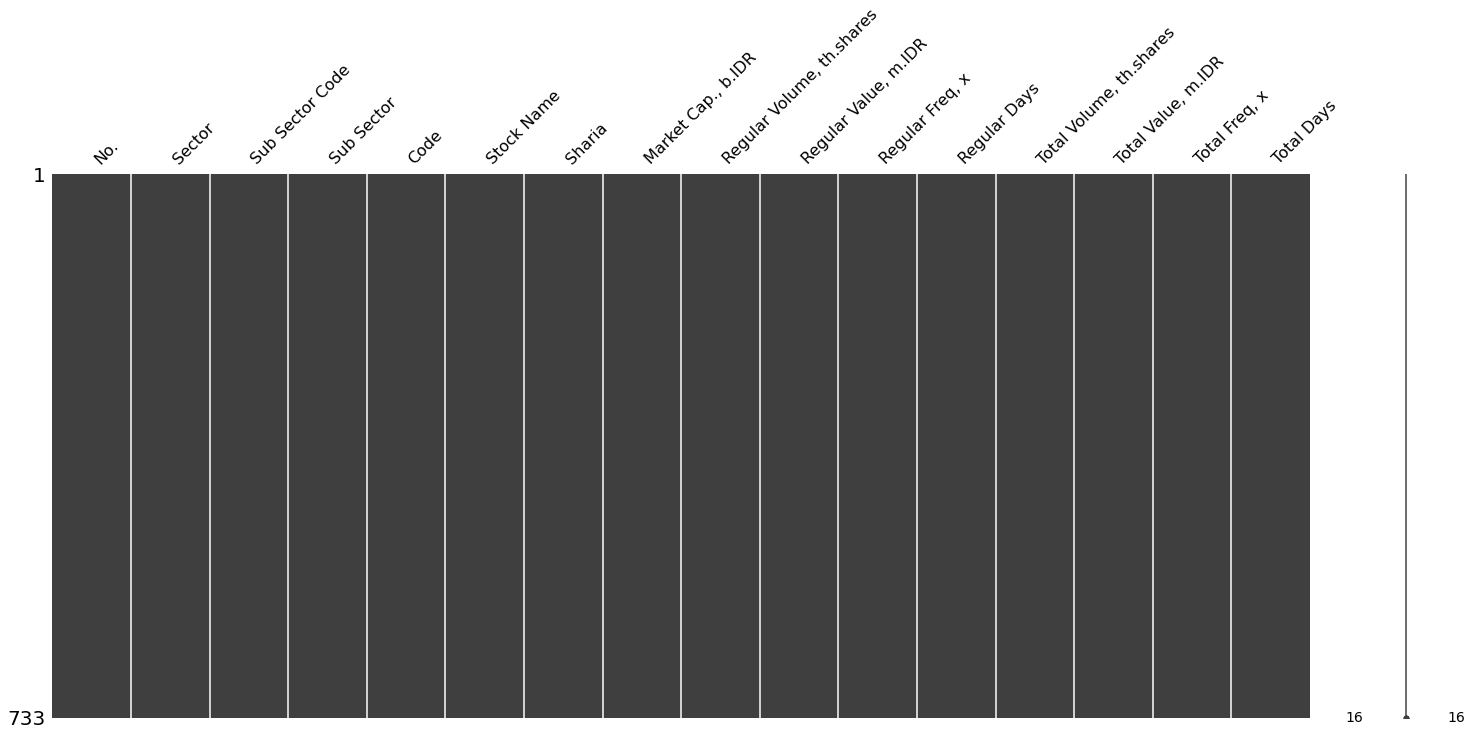

In [ ]:
msno.matrix(data)
plt.show()

#Eksplorasi dan Visualisasi Data

In [ ]:
data.duplicated().value_counts()

False    733
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

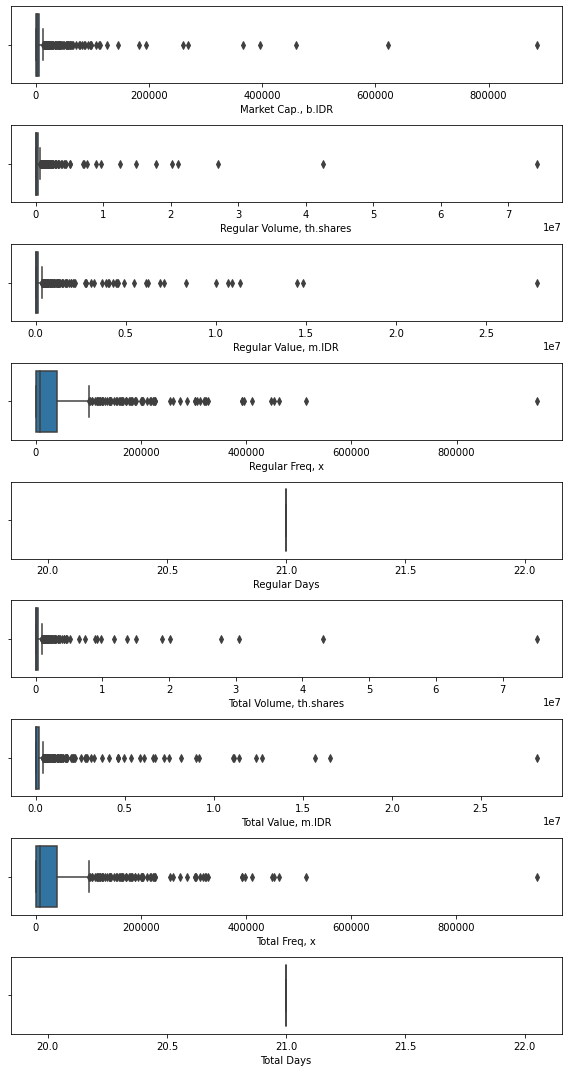

In [ ]:
fig, ax = plt.subplots(9, figsize = (8, 15))
plot_market = sns.boxplot(data['Market Cap., b.IDR'], ax = ax[0])
plot_rvolume = sns.boxplot(data['Regular Volume, th.shares'], ax = ax[1])
plot_rvalue = sns.boxplot(data['Regular Value, m.IDR'], ax = ax[2])
plot_rfreq = sns.boxplot(data['Regular Freq, x'], ax = ax[3])
plot_rd = sns.boxplot(data['Regular Days'], ax = ax[4])
plot_tvolume = sns.boxplot(data['Total Volume, th.shares'], ax = ax[5])
plot_tvalue = sns.boxplot(data['Total Value, m.IDR'], ax = ax[6])
plot_tfreq = sns.boxplot(data['Total Freq, x'], ax = ax[7])
plot_tdays = sns.boxplot(data['Total Days'], ax = ax[8])
plt.tight_layout()

In [ ]:
data['Sharia'].value_counts()

S    474
-    259
Name: Sharia, dtype: int64

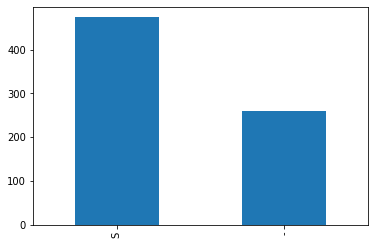

In [ ]:
data['Sharia'].value_counts().plot(kind = 'bar')
plt.show()

Pemilihan Variabel

In [ ]:
data=data.drop(['No.', 'Sector', 'Sub Sector Code', 'Sub Sector','Stock Name','Total Days','Regular Days'],axis=1)
data

,Code,Sharia,"Market Cap., b.IDR","Regular Volume, th.shares","Regular Value, m.IDR","Regular Freq, x","Total Volume, th.shares","Total Value, m.IDR","Total Freq, x"
0,ADMR,S,64594.083770,4256469.0,8.374060e+06,513277.0,4534704.737,8.992273e+06,513482.0
1,ADRO,S,91479.851320,3407169.6,1.090450e+07,391563.0,3459957.797,1.107518e+07,391867.0
2,AIMS,S,55.440000,651.4,1.670362e+02,698.0,651.400,1.670362e+02,698.0
3,AKRA,S,20675.678838,1128236.6,1.247602e+06,118168.0,1189868.116,1.314792e+06,118395.0
4,APEX,S,962.100919,18626.0,7.577677e+03,8419.0,18626.000,7.577677e+03,8419.0
...,...,...,...,...,...,...,...,...,...
785,SDMU,-,101.035025,1141895.4,1.234956e+05,89712.0,1141895.400,1.234956e+05,89712.0
786,SMDR,S,9104.833600,350648.3,1.185341e+06,166155.0,352337.500,1.189988e+06,166160.0
787,TMAS,S,15346.853500,86514.3,2.378928e+05,68560.0,86985.376,2.393491e+05,68567.0
788,TNCA,S,179.618640,262594.4,1.324810e+05,68356.0,262594.400,1.324810e+05,68356.0


Pembentukan Dummy Variabel

In [ ]:
dms = pd.get_dummies(data[['Sharia']])
data= pd.concat([data,dms], axis=1 )
data = data.drop(['Sharia'],axis=1)

In [ ]:
data

,Code,"Market Cap., b.IDR","Regular Volume, th.shares","Regular Value, m.IDR","Regular Freq, x","Total Volume, th.shares","Total Value, m.IDR","Total Freq, x",Sharia_-,Sharia_S
0,ADMR,64594.083770,4256469.0,8.374060e+06,513277.0,4534704.737,8.992273e+06,513482.0,0,1
1,ADRO,91479.851320,3407169.6,1.090450e+07,391563.0,3459957.797,1.107518e+07,391867.0,0,1
2,AIMS,55.440000,651.4,1.670362e+02,698.0,651.400,1.670362e+02,698.0,0,1
3,AKRA,20675.678838,1128236.6,1.247602e+06,118168.0,1189868.116,1.314792e+06,118395.0,0,1
4,APEX,962.100919,18626.0,7.577677e+03,8419.0,18626.000,7.577677e+03,8419.0,0,1
...,...,...,...,...,...,...,...,...,...,...
785,SDMU,101.035025,1141895.4,1.234956e+05,89712.0,1141895.400,1.234956e+05,89712.0,1,0
786,SMDR,9104.833600,350648.3,1.185341e+06,166155.0,352337.500,1.189988e+06,166160.0,0,1
787,TMAS,15346.853500,86514.3,2.378928e+05,68560.0,86985.376,2.393491e+05,68567.0,0,1
788,TNCA,179.618640,262594.4,1.324810e+05,68356.0,262594.400,1.324810e+05,68356.0,0,1


In [ ]:
data.dtypes

Code                          object
Market Cap., b.IDR           float64
Regular Volume, th.shares    float64
Regular Value, m.IDR         float64
Regular Freq, x              float64
Total Volume, th.shares      float64
Total Value, m.IDR           float64
Total Freq, x                float64
Sharia_-                       uint8
Sharia_S                       uint8
dtype: object

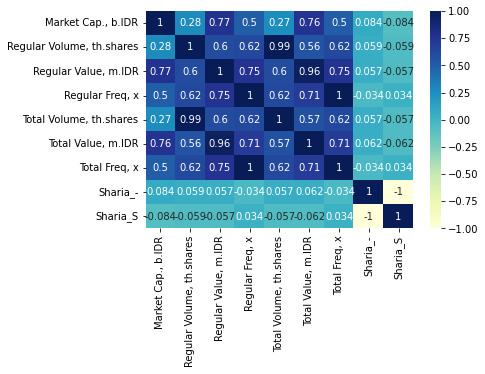

In [ ]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

Spilting Data

In [ ]:
X = data.drop(['Total Volume, th.shares'], axis = 1)
y = data['Total Volume, th.shares']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Linear Regression

In [ ]:
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np

In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = X_train[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
# features to consider removing
considered_features = ['Market Cap., b.IDR','Regular Volume, th.shares','Regular Value, m.IDR',
     'Regular Freq, x', 'Total Value, m.IDR', 'Total Freq, x']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Variable,VIF
5,"Total Freq, x",191526.985193
3,"Regular Freq, x",191308.008080
2,"Regular Value, m.IDR",21.266765
4,"Total Value, m.IDR",16.886792
0,"Market Cap., b.IDR",3.983611
1,"Regular Volume, th.shares",2.507032


Normalisasi

In [ ]:
num=['Market Cap., b.IDR','Regular Volume, th.shares','Regular Value, m.IDR',
     'Regular Freq, x', 'Total Value, m.IDR', 'Total Freq, x']

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train[num])
X_test = scaler.transform(X_test[num])

#Modelling

In [ ]:
from scipy.stats import kstest
#perform Kolmogorov-Smirnov test
kstest(y_train, 'norm')

KstestResult(statistic=0.9941486491105009, pvalue=0.0)

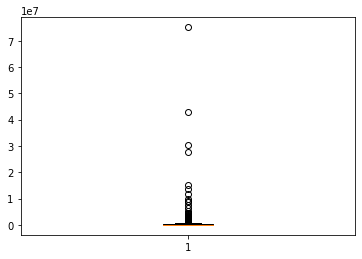

In [ ]:
# Creating plot
plt.boxplot(y_train)

# show plot
plt.show()

In [ ]:
ridge_model= Ridge().fit(X_train, y_train)

In [ ]:
y_pred= ridge_model.predict(X_test)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Testing performance')
print('MAPE: {:.4f}'.format(mape))
print('MAE: {:.4f}'.format(mae))
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

Testing performance
MAPE: 6216.2914
MAE: 408895.2167
RMSE: 1137211.1641
R2: 0.6534
